# Introdução
Neste notebook resolvemos o desafio do Titanic no qual o objetivo é prever se os passageiros teriam sobrevivido ou não.
Ao desenvolver o projeto, foram indicados links para consulta de bibliotecas ou artigos que foram de grande utilidade na aprendizagem. Sugestões de melhorias são sempre bem-vindas!

Está dividido do seguinte modo:

* Parte 1 - Foi onde conhecemos os dados, fazemos algumas inferências para chegar a conclusões com a visualização dos dados.

* [Parte 2 -](https://www.kaggle.com/samuelsferreira/desafio-do-titanic-passo-a-passo-parte-2-2) Manipulamos, preparamos os dados de entrada, aplicamos os modelos, comparamos os resultados, escolhemos os 3  com melhores desempenhos para a etapa de validação. Por fim, foram submetidos à competição do Kaggle e comparados os resultados da competição com o nosso.

## **Parte 1**
### 1. Importando as Bibliotecas e Dados

### 2. Explorando os Dados
   #### 2.1 Entendendo as colunas
   #### 2.2 Entendendo os dados faltantes
   #### 2.3 Entendendo a distribuição dos dados   
   #### 2.4 Visualização dos dados
       2.4.1 Sobreviventes
       2.4.2 Sobreviventes por sexo
       2.4.3 Sobreviventes por classe
       2.4.4 Sobreviventes por local de embarque
       2.4.5 Sobreviventes por cônjuge e parentes
       2.4.6 Sobreviventes por idade
   #### 2.5 Correlação dos dados
   
   

## **Parte 2**
### 3. Preparação dos dados
#### 3.1 Juntando os datasets train e test
#### 3.2 Selecionando as features
#### 3.3 Tratando os valores faltantes
#### 3.4 Preparando as variáveis para os modelos
#### 3.5 Separando os datasets de treino e teste

### 4. Construção dos Modelos e Avaliação 
#### 4.1 Dummy Classifier
#### 4.2 Regressão Logística
#### 4.3 Decision Tree
#### 4.4 Regressão Linear
#### 4.5 Gradient Boosting Classifier
#### 4.6 Random Forest Classifier
#### 4.7 XGB Classifier
#### 4.8 SVC
#### 4.9 KNeighbors Classifier
#### 4.10 Comparando os Modelos


### 5. Matriz de Confusão, Precisão, Recall, e F1-Score 
#### 5.1 Matriz de Confusão
#### 5.2 Precisão
#### 5.3 Recall
#### 5.4 F1-Score
#### 5.5 Classification Report
#### 5.6 ROC Curve (Receiver Operating Characteristic Curve)

### 6. Validação cruzada 
#### 6.1 Cross Validation para os modelos
#### 6.2 Comparando com os resultados obtido no Kaggle

### 7. Conclusão - Você teria sobrevivido ao Titanic?


# **1 - Importando as Bibliotecas e Dados**

In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
%matplotlib inline

In [2]:
#importando os dados
train = pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')

# **2 - Explorando os Dados**
Nesta seção vamos conhecer como os dados se apresentam e buscar informações por meio da visualização de dados e a correlação entre eles.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## **2.1 - Entendendo as colunas**
- **PassengerId** - é o número de identificação do passageiro
- **Survived** - informa se o passageiro sobreviveu (1) ou não (0).
- **Pclass** - Classe em que o passageiro embarcou: 1 é a 1ª classe, 2 é a 2ª classe e 3 é a 3ª classe.
- **Name** - Nome do Passageiro
- **Sex** - M para Masculino e F para Feminino
- **Age** - Idade do Passageiro.
- **SibSp** - quantidade de cônjuge e irmãos a bordo
- **Parch** - Quantidade de Pais e Filhos a bordo.
- **Ticket** - Número da passagem
- **Fare** - Valor pago pela passagem
- **Cabin** - Cabine que o passageiro estava alojado
- **Embarked** - porto que o passageiro embarcou: C é Cherbourg, Q é Queenstown, S é Southampton

In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Entendendo os tipos de Variáveis de cada coluna**

**Variáveis categóricas:** Name, Sex, Ticket, Cabin, Embarked

**Variáveis numéricas:** PassengerId, Survived, PClass, Age, SibSp, Parch, Fare

O dataset de treino possui 12 colunas e 891 linhas, enquanto o dataset de teste possui 11 colunas e 418 linhas. A coluna a menos é a coluna alvo, Survived, que é o o bjetivo da competição: prever a sobrevivência dos passageiros do dataset test.

Notamos que a quantidade de dados não-nulos nas colunas são diferentes, isso significa que futuramente precisaremos tomar uma decisão em relação a eles.

## **2.2 - Entendendo os dados faltantes**

In [7]:
train.isna().sum() #vemos que qa colunas Age, Cabin e Embarked possuem dados faltantes, mas o quanto isso representa do total?

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Em porcentagem
((train.isna().sum()/train.shape[0]).sort_values(ascending=False)) *100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

**A variável Cabin tem 77% dos dados faltando, a Age 19,86% e a Embarked apenas 0,22%. Na Seção 3 trataremos esses dados faltantes.**

## **2.3 - Entendendo a Distribuição dos dados**

Iremos agora ter uma ideia de média, mediana, quartis das variáveis numéricas do dataset train.

    


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A média de idade foi de de 29,6 anos com 20% dos passageiros abaixo dos 21 anos e 25 %acima dos 38 anos. O passageiro com  mais idade na viagem tinha 80 anos!

Sobre o valor monetário das passagens: variaram entre 0 e 512, talvez o 0 seja referente aos tripulantes; 75% dos passageiros pagaram valor igual ou menor a 31 e os outros 25% pagaram entre 31 e 512. Valores provavelmente relacionados as classes.

Mais de 75% não viajaram como pais e filhos e mais da metade do passageiros não tinham parentes ou cônjuge a bordo.

Menos de 25% dos passageiros viajaram na 1ªClasse e mais de 50% dos passageiros viajaram na 3ªclasse.

## **2.4 - Visualização dos Dados**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f22327f50>,
      dtype=object)

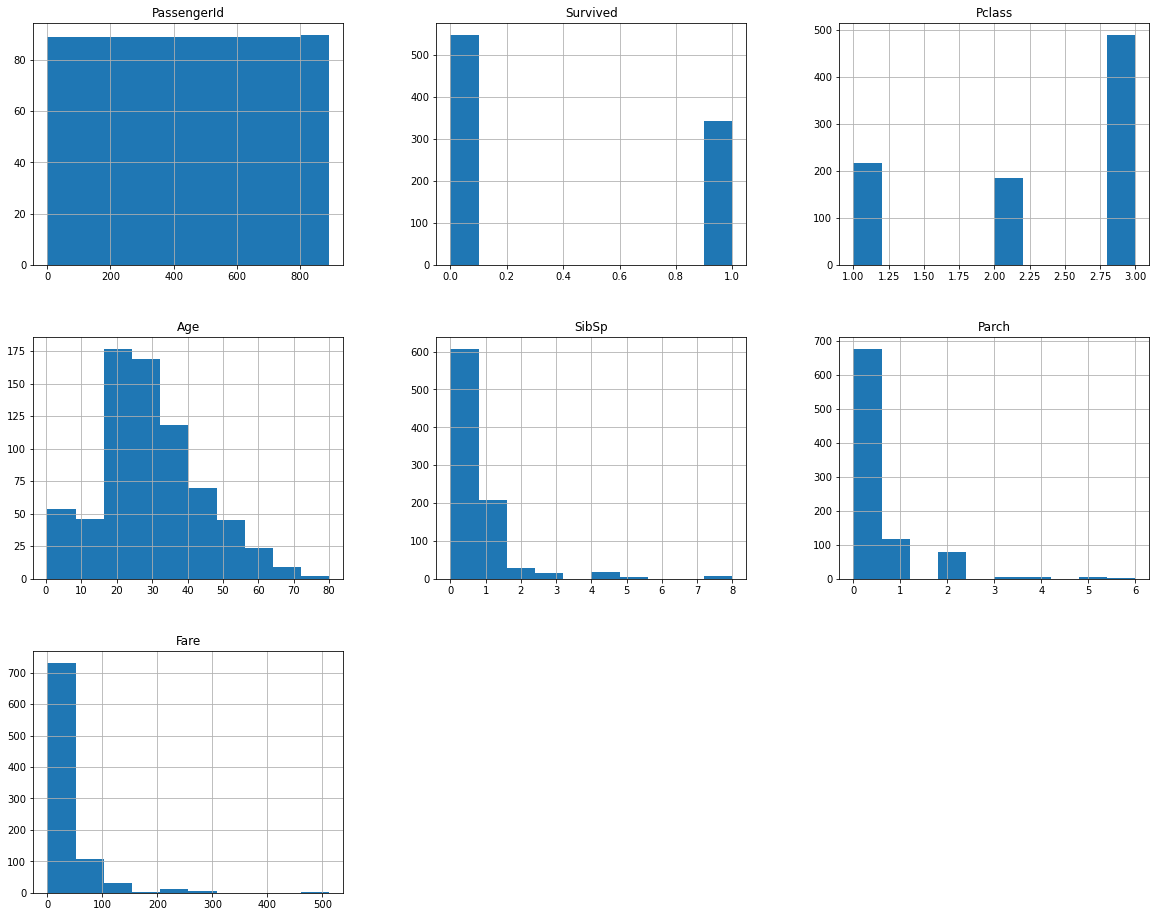

In [10]:
#histograma das variáveis numéricas
train.hist(figsize=(20,16))

Podemos concluir ao analisar os gráficos que:
- Visualmente a chance de não sobreviver é maior do que a de sobreviver.
- Há mais pessoas na 3ª classe que nas demais juntas, talvez nesse número deva estar incluso os tripulantes.
- Há bastante passageiros entre 20 e 50 anos. Será que isso influência na taxa de sobrevivência?
- A maioria das pessoas estão viajando sozinhas, ou seja, sem parentes ou conjuge. Será que estar acompanhados parentes ou conjuge aumenta a chance de sobrevivência.
-Como a maioria é de 3ªClasse é esperado um pagamento menor no valor da passagem, assim como os membros da tripulação devem ter pago $0.

A seguir iremos detalhar os dados dos gráficos acima e responder essas questões visualmente.

### **2.4.1 - Sobreviventes**

Qual o número de sobreviventes do Titanic? Qual a taxa de sobreviventes sem levar em conta outros fatores?

Se você tivesse feito a viagem do Titanic qual seria sua chance de sobreviver?
É o que vamos descobrir baseado-se nos dados do dataset train.

In [11]:
#definindo os dados que aparecerão no gráfico

labels = ['Não Sobreviventes', "Sobreviventes"] 

contagem = pd.cut(x=train.Survived, bins=2,labels= labels, include_lowest=True).value_counts() #nº de sobreviventes

taxa_de_sobreviventes = (pd.value_counts(pd.cut(x=train.Survived, bins=2,labels= labels, 
                                                include_lowest=True),normalize=True) * 100).round(1) #taxa de Sobreviventes
quant_sobrevi = pd.DataFrame({"Contagem":contagem, 
                              'Taxa de Sobrevivência(%)':taxa_de_sobreviventes}) #criando um DataFrame para facilitar a visualização dos dados
                              
quant_sobrevi

,Contagem,Taxa de Sobrevivência(%)
Não Sobreviventes,549,61.6
Sobreviventes,342,38.4


Text(0.5, 1.0, 'Taxa de Sobreviventes do Titanic')

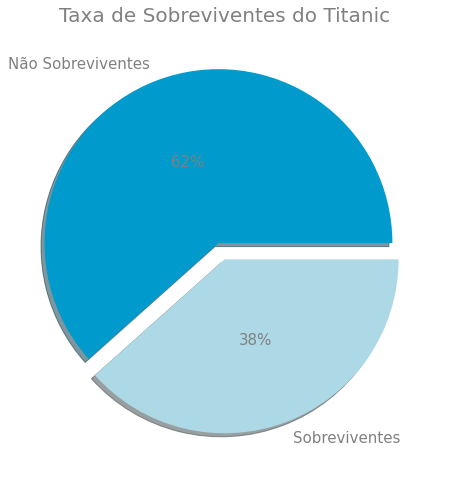

In [12]:
plt.figure(figsize=(10,8))

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'gray'
plt.rcParams['axes.labelcolor']= 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['font.size']=15


cores= ['#009ACD', '#ADD8E6']
percentages = list(quant_sobrevi['Taxa de Sobrevivência(%)'])
explode=(0.1,0)

plt.pie(percentages, explode=explode, 
       labels=labels,
       colors = cores,
       autopct='%1.0f%%',
       shadow=True, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
plt.title("Taxa de Sobreviventes do Titanic", fontsize=20, pad=20)

Infelizmente a maioria dos passageiros não sobreviveram.
Se você estivesse lá a chance de ter sobrevivido seria de aproximadamente de 38%. 

**Mas será que essa chance foi a mesma para todos a bordo?** 

**Algum grupo foi privilegiado?**  É o que vamos investigar nas próximas seções!

### **2.4.2 - Sobrevivência por Sexo**

Vimos na seção anterior que no geral a taxa de sobrevivência está em torno de 40%. 
Será que esse valor foi o mesmo tanto para  o sexo masculino quanto para o sexo feminino? 

In [13]:
#Quantidade de pessoas por sexo
quant_sex=pd.DataFrame(train['Sex'].value_counts())
quant_sex['Sex em %'] = (quant_sex/(quant_sex.Sex.sum()) *100).round(2)
quant_sex['Nº Sobreviventes por Sexo']= train.groupby('Sex')['Survived'].sum()
quant_sex['Taxa de Sobreviventes por Sexo em %'] = (quant_sex['Nº Sobreviventes por Sexo']/quant_sex['Sex'] *100).round(2)

quant_sex

,Sex,Sex em %,Nº Sobreviventes por Sexo,Taxa de Sobreviventes por Sexo em %
male,577,64.76,109,18.89
female,314,35.24,233,74.20


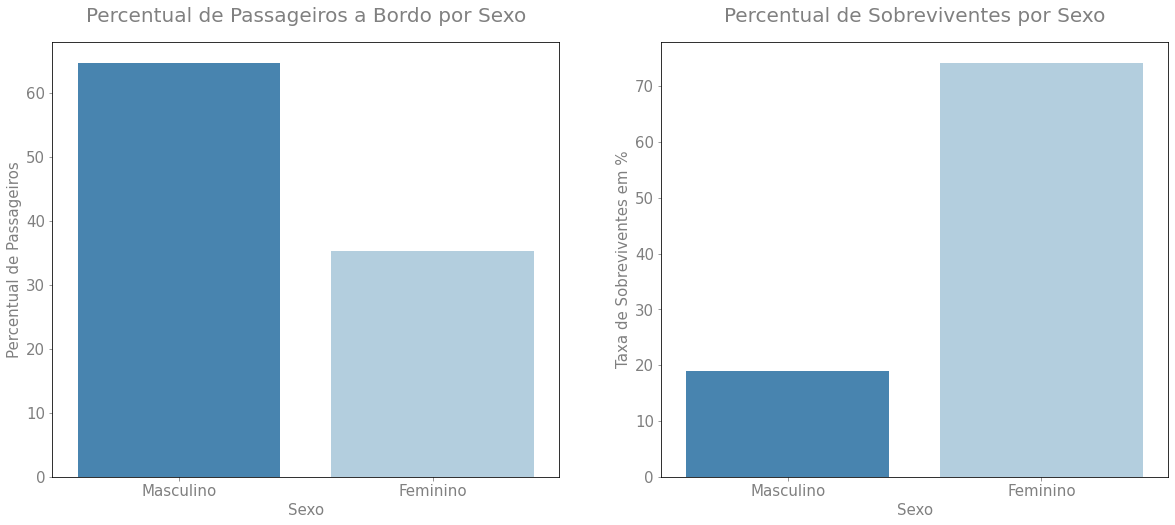

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [14]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,8))

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=15

plt.figure(figsize=(10,8))
ax = sns.barplot(x=quant_sex.index, y="Sex em %", data=quant_sex, ax=axis1, palette = 'Blues_r')
ax.set_title("Percentual de Passageiros a Bordo por Sexo", fontsize=20,pad=20)
ax.set_xlabel('Sexo', fontsize=15)
ax.set_ylabel('Percentual de Passageiros', fontsize=15)
ax.set_xticklabels(labels=['Masculino', 'Feminino'])
plt.tight_layout()



plt.figure(figsize=(10,8))
ax = sns.barplot(x=quant_sex.index, y='Taxa de Sobreviventes por Sexo em %', data=quant_sex, ax=axis2, palette = 'Blues_r')
ax.set_title("Percentual de Sobreviventes por Sexo", fontsize=20,pad=20)
ax.set_xlabel('Sexo', fontsize=15)
ax.set_ylabel('Taxa de Sobreviventes em %', fontsize=15)
ax.set_xticklabels(labels=['Masculino', 'Feminino'])
plt.tight_layout()


No navio 65% dos passageiros eram  do sexo masculino e 35%  do sexo feminino, uma relação de aproximadamente 2 para 1.

No entanto a taxa de sobreviventes no Sexo Feminino foi próxima dos 75% enquanto do Sexo Masculino foi de 20%.

Isso sugere que as mulheres tiveram 2,5 vezes mais chances de sobreviverem ao desastre do Titanic do que os homens.

### **2.4.3 - Sobreviventes por Classe**

O Navio estava dividido em 3 Classes que provavelmente estão relacionadas o poder aquisitivo dos passageiros. 
Isso também influênciou na arquitetura e layout do navio pois as classes tinham localizações diferentes como pode ser visto neste artigo: [Titanic a fundo.](https://https://titanicosemacao.wordpress.com/2012/03/10/titanic-a-fundo/)

Alguma classe teria tido maiores chances de sobrevivência?

In [15]:
quant_class = pd.DataFrame(train.Pclass.value_counts()) #Quantidade por Classe

quant_class['% de passageiros por Classe']= np.round(((quant_class['Pclass']/train.shape[0])*100),2)

quant_class['Nº de sobreviventes por Classe'] = train.groupby('Pclass')['Survived'].sum()

quant_class['Taxa de Sobreviventes por Classe em %'] = (quant_class['Nº de sobreviventes por Classe']/quant_class['Pclass'] *100).round(2)

quant_class

,Pclass,% de passageiros por Classe,Nº de sobreviventes por Classe,Taxa de Sobreviventes por Classe em %
3,491,55.11,119,24.24
1,216,24.24,136,62.96
2,184,20.65,87,47.28


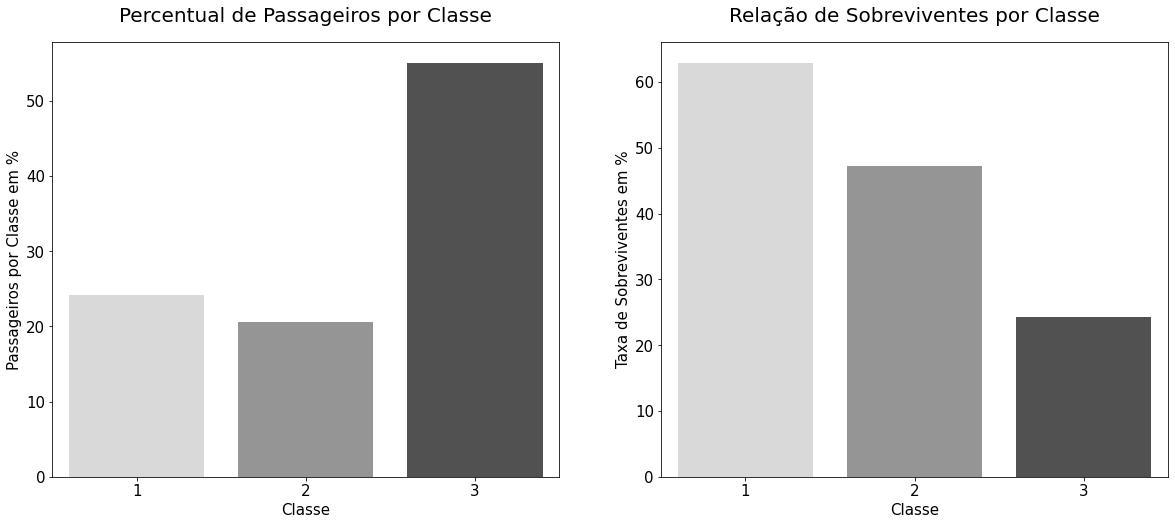

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [16]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,8))

plt.figure(figsize=(10,8))
ax = sns.barplot(x=quant_class.index, y='% de passageiros por Classe', data=quant_class,
                 ax= axis1, palette='Greys')
ax.set_xlabel('Classe', fontsize=15)
ax.set_ylabel('Passageiros por Classe em %', fontsize=15)
ax.set_title('Percentual de Passageiros por Classe', fontsize=20, pad=20 )
plt.tight_layout()


plt.figure(figsize=(10,8))
ax = sns.barplot(x=quant_class.index, y='Taxa de Sobreviventes por Classe em %', data=quant_class,
                 ax= axis2, palette='Greys')
ax.set_xlabel('Classe', fontsize=15)
ax.set_ylabel('Taxa de Sobreviventes em %', fontsize=15)
ax.set_title('Relação de Sobreviventes por Classe', fontsize=20, pad=20 )
plt.tight_layout()

A quantidade de passageiros da classe 3 é maior do que as classes 1 e 2 somadas, não obstante, estar na classe 1 teria 2,5 vezes mais chances de sobreviver do que quem estva alojado na classe 3.

Já os passageiros da classe 2 tem 2 x mais chances de sobreviver aos da classe 1.

Parece que ter viajado na classe 3 foi uma 'desvantagem' na hora de se salvar.

Será que a distribuição de equipamentos de segurança levavam em conta, por algum motivo, a classe do passageiro? Ou talvez tais equipamentos estavam alojados nas proximidades das classes 1 e 2?


### **2.4.4 - Sobreviventes por Local de Embarque**

Os passageiros e tripulantes do Titanic embarcaram em 3 portos diferentes, onde, **C é Cherbourg, Q é Queenstown, S é Southampton**.

Houve alguma influência nas chances de sobrevivência de acordo com o local de embarque?

In [17]:
quant_emb = pd.DataFrame(train.Embarked.value_counts()) #quantidade de pessoas que embarcaram em cada porto

quant_emb['% passageiros por local de Embarque'] = (train.Embarked.value_counts()*100/train.shape[0]).round(2)

quant_emb['Nº de Sobreviventes por Local de Embarque'] = train.groupby('Embarked')['Survived'].sum()

quant_emb['Taxa de Sobreviventes por Local em %'] = (quant_emb['Nº de Sobreviventes por Local de Embarque']/quant_emb['Embarked'] *100).round(2).round(2)

quant_emb

,Embarked,% passageiros por local de Embarque,Nº de Sobreviventes por Local de Embarque,Taxa de Sobreviventes por Local em %
S,644,72.28,217,33.70
C,168,18.86,93,55.36
Q,77,8.64,30,38.96


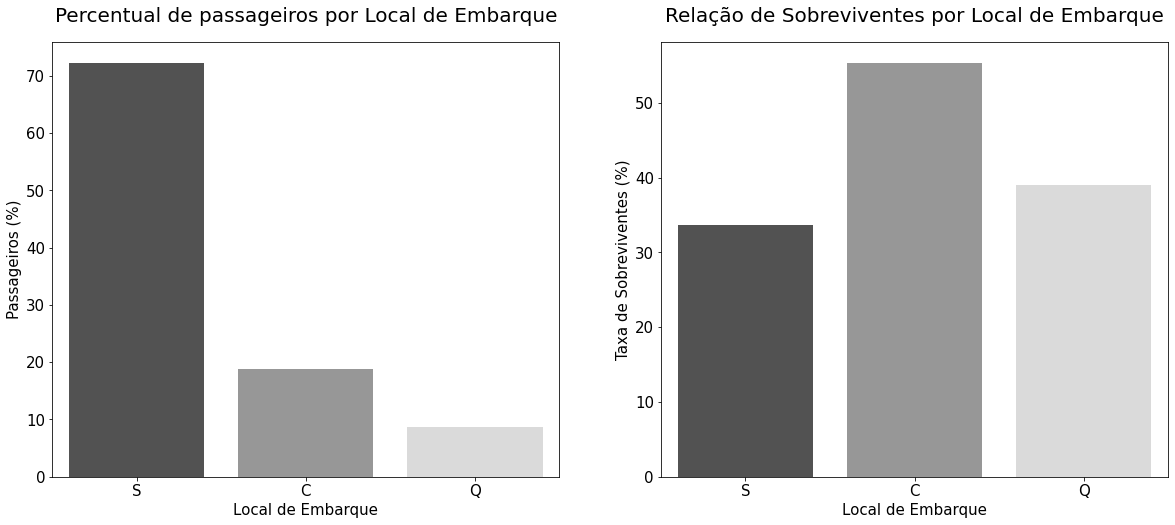

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [18]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,8))

plt.figure(figsize=(10,8))
ax = sns.barplot(x=quant_emb.index,y='% passageiros por local de Embarque',data=quant_emb, 
                 ax=axis1, palette='Greys_r' )

ax.set_title("Percentual de passageiros por Local de Embarque", fontsize=20,pad=20,)
ax.set_xlabel('Local de Embarque', fontsize=15)
ax.set_ylabel('Passageiros (%)', fontsize=15)
plt.tight_layout()

plt.figure(figsize=(10,8))
ax = sns.barplot(x=quant_emb.index, y='Taxa de Sobreviventes por Local em %', data=quant_emb,
                 ax= axis2, palette='Greys_r')
ax.set_xlabel('Local de Embarque', fontsize=15)
ax.set_ylabel('Taxa de Sobreviventes (%)', fontsize=15)
ax.set_title('Relação de Sobreviventes por Local de Embarque', fontsize=20, pad=20 )
plt.tight_layout()

Majoritariamente o embarque foi realizado em Southampton e é onde a taxa de sobrevivência é menor. Particularmente não acredito que o local de embarque esteja relacionado diretamente a taxa de mortes, isto é, suspeito que outros fatores já investigados anteriormente, possam te correlação como:
- um maior número da Classe 3 embarcou em Southampton
- os embarque dos tripulantes pode ter acontecido em Southpton
- maior número de homens embarcado em Southpton.

**Vamos investigar outros fatores em conjunto com o local de embarque para ver se minha desconfiança faz sentido e poserá ser explicada**.


In [19]:
sus_1 = pd.DataFrame(train.groupby('Embarked')['Pclass'].value_counts()).T #susspeita 1
sus_1

Embarked   C           Q          S          
Pclass     1   3   2   3  2  1    3    2    1
Pclass    85  66  17  72  3  2  353  164  127

In [20]:
embar_s



NameError: name 'embar_s' is not defined

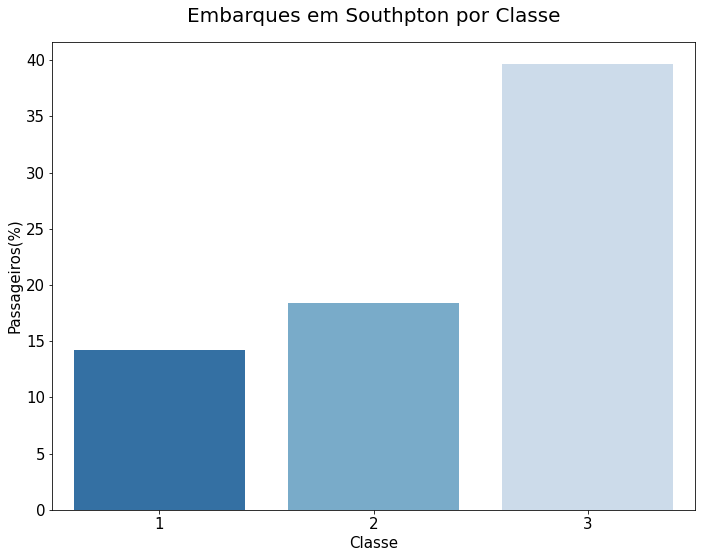

In [21]:
embar_s = pd.DataFrame(train.query('Embarked == "S"')['Pclass'].value_counts()/ train.shape[0] *100)


plt.figure(figsize=(10,8))
ax = sns.barplot(x=embar_s.index, y='Pclass', data=embar_s,
                  palette='Blues_r')
ax.set_xlabel('Classe', fontsize=15)
ax.set_ylabel('Passageiros(%)', fontsize=15)
ax.set_title('Embarques em Southpton por Classe', fontsize=20, pad=20 )
plt.tight_layout()



**Como suspeitávamos, em Southpton houve um embarque da maior parte da passageiros da classe 3, equivalente a 39% de todos os passageiros do navio**

In [22]:
sus_2 = pd.DataFrame(train.groupby('Embarked')['Sex'].value_counts()).T #suspeita 2
sus_2

Embarked    C           Q           S       
Sex      male female male female male female
Sex        95     73   41     36  441    203

In [23]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
embar_s = pd.DataFrame(train.query('Embarked == "S"')['Sex'].value_counts())
embar_s['H e M'] = train.Sex.value_counts()
embar_s['% H e M']= embar_s['Sex']/embar_s['H e M'] *100
embar_s

,Sex,H e M,% H e M
male,441,577,76.429809
female,203,314,64.649682


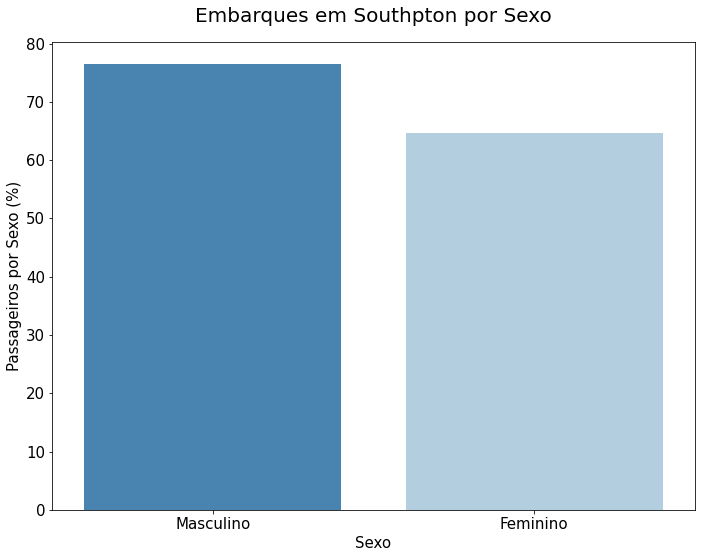

In [25]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x=embar_s.index, y='% H e M', data=embar_s,
                  palette='Blues_r')
ax.set_xlabel('Sexo', fontsize=15)
ax.set_ylabel('Passageiros por Sexo (%)', fontsize=15)
ax.set_title('Embarques em Southpton por Sexo', fontsize=20, pad=20 )
ax.set_xticklabels(labels=['Masculino', 'Feminino'])
plt.tight_layout()

* **Outra Suspeita confirmada, aproximadamente 75% dos homens e 65% das mulheres a bordo embarcaram em Southpton.**

### **2.4.5 - Cônjuge e parentes**

Viajar acompanhado de parentes influência nas chances de sobrevivência?
Intuitivamente acreditamos que sim, já que pode ter ajuda principalmente na hora de compartilhar os equipamentos de salva-vidas. Nossa intuição está correta?

#### **2.4.5.1 SibSp - Irmãos e Esposas a bordo do Titanic**

In [26]:
quant_sibsp = pd.DataFrame(train.SibSp.value_counts())
quant_sibsp['% Percentual'] = (quant_sibsp/train.shape[0] *100).round(2)
quant_sibsp['Nº de sobreviventes por SibSp'] = train.groupby('SibSp')['Survived'].sum()
quant_sibsp['Taxa de Sobreviventes por SibSp em %'] = (quant_sibsp['Nº de sobreviventes por SibSp']/quant_sibsp['SibSp'] *100).round(2)

quant_sibsp

,SibSp,% Percentual,Nº de sobreviventes por SibSp,Taxa de Sobreviventes por SibSp em %
0,608,68.24,210,34.54
1,209,23.46,112,53.59
2,28,3.14,13,46.43
4,18,2.02,3,16.67
3,16,1.80,4,25.00
8,7,0.79,0,0.00
5,5,0.56,0,0.00


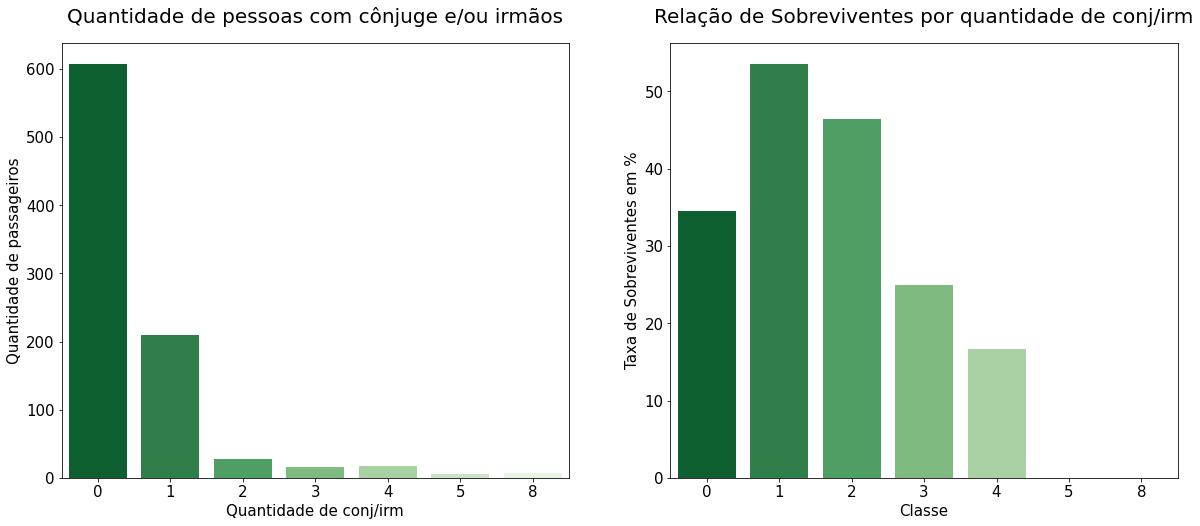

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [27]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,8))

plt.figure(figsize=(10,8))
ax = sns.barplot(x=quant_sibsp.index,y='SibSp',data=quant_sibsp, 
                 ax=axis1, palette='Greens_r' )

ax.set_title("Quantidade de pessoas com cônjuge e/ou irmãos", fontsize=20,pad=20,)
ax.set_xlabel('Quantidade de conj/irm', fontsize=15)
ax.set_ylabel('Quantidade de passageiros', fontsize=15)
plt.tight_layout()

plt.figure(figsize=(10,8))
ax = sns.barplot(x=quant_sibsp.index, y="Taxa de Sobreviventes por SibSp em %", data=quant_sibsp,
                 ax= axis2, palette='Greens_r')
ax.set_xlabel('Classe', fontsize=15)
ax.set_ylabel('Taxa de Sobreviventes em %', fontsize=15)
ax.set_title('Relação de Sobreviventes por quantidade de conj/irm', fontsize=20, pad=20 )
plt.tight_layout()

A maioria dos passageiros (68%) viajou sem o conjuge ou irmãos, mas os sobreviventes que foram nessas condições é de 34%, enquanto dos que viajavam apenas com um irmão ou o cônjuge  sobreviveram em 53%.

Viajar sem companhia só foi  melhor do que viajar com 3 ou mais pessoas-irmãos ou cônjuge.

#### **2.4.5.2 Parch - Pais e filhos a bordo do Titanic**

In [28]:
quant_parch = pd.DataFrame(train.Parch.value_counts())
quant_parch['% Percentual'] = (quant_parch/train.shape[0] *100).round(2)
quant_parch['Nº de sobreviventes por Parch'] = train.groupby('SibSp')['Survived'].sum()
quant_parch['Taxa de Sobreviventes por Parch em %'] = (quant_parch['Nº de sobreviventes por Parch']/quant_parch['Parch'] *100).round(2)

quant_parch

,Parch,% Percentual,Nº de sobreviventes por Parch,Taxa de Sobreviventes por Parch em %
0,678,76.09,210.0,30.97
1,118,13.24,112.0,94.92
2,80,8.98,13.0,16.25
5,5,0.56,0.0,0.00
3,5,0.56,4.0,80.00
4,4,0.45,3.0,75.00
6,1,0.11,NaN,NaN


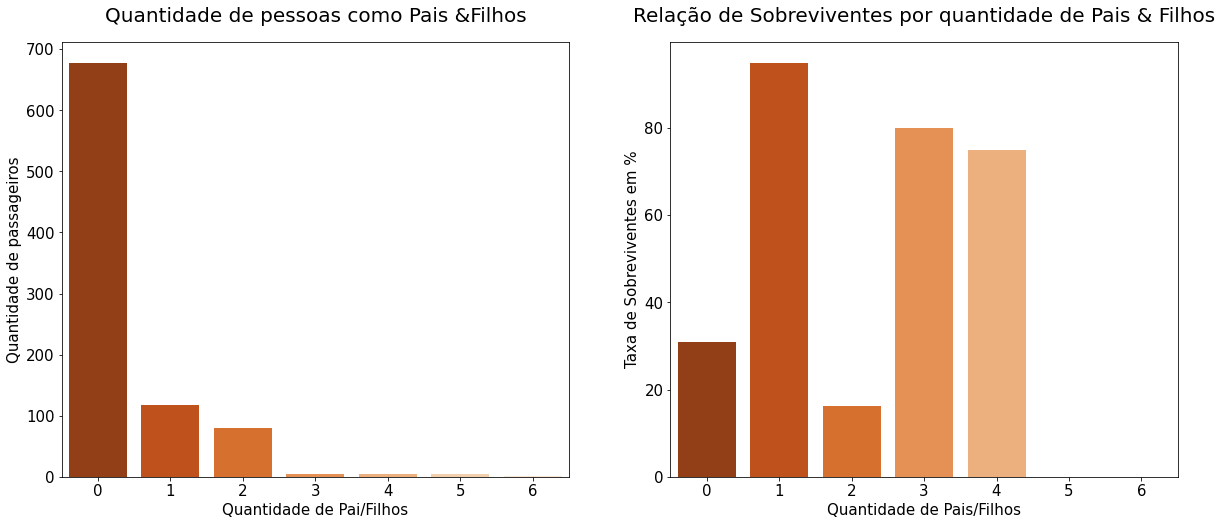

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [29]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,8))

plt.figure(figsize=(10,8))
ax = sns.barplot(x=quant_parch.index,y='Parch',data=quant_parch, 
                 ax=axis1, palette='Oranges_r' )

ax.set_title("Quantidade de pessoas como Pais &Filhos", fontsize=20,pad=20,)
ax.set_xlabel('Quantidade de Pai/Filhos', fontsize=15)
ax.set_ylabel('Quantidade de passageiros', fontsize=15)
plt.tight_layout()

plt.figure(figsize=(10,8))
ax = sns.barplot(x=quant_parch.index, y='Taxa de Sobreviventes por Parch em %', data=quant_parch,
                 ax= axis2, palette='Oranges_r')
ax.set_xlabel('Quantidade de Pais/Filhos', fontsize=15)
ax.set_ylabel('Taxa de Sobreviventes em %', fontsize=15)
ax.set_title('Relação de Sobreviventes por quantidade de Pais & Filhos', fontsize=20, pad=20 )
plt.tight_layout()

76% dos passageiros viajaram sem filhos e aproximadamente 20% tinham entre um e 2 filhos. 

Interessante notar que 94% dos que tinham 1 filho ou 1 dos pais a bordo sobreviveram. 

Definitivamente viajar com os pais e filhos aumentaram as chances de sobreviver. :D 

### **2.4.6 - Sobreviventes por idade**

In [30]:
pd.DataFrame(train.Age.describe())

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [31]:
train.Age.isna().sum() 

177

Temos 177 dados faltantes na coluna idade Será que isso faz a diferença no calculo das médias? Vamos Checar.

In [32]:
train_1 = train.dropna() #eliminando e verificando os dados faltantes
train_1.Age.isna().sum()

0

In [33]:
pd.DataFrame(train_1.Age.describe()) 

,Age
count,183.000000
mean,35.674426
std,15.643866
min,0.920000
25%,24.000000
50%,36.000000
75%,47.500000
max,80.000000


Conforme as duas últimas tabelas acima: sim, faz diferença! A média era de 29 anos e com a remoção dos dados incompletos a média de idade subiu para 35 anos. 

Como 177 dados é um quantidade representativa do nosso dataset e excluí-los prejudicaria nossas análises, pois, excluiríamos outros dados também. Uma opção é preenchê-los com a média das idades ou moda. Na prócxima seção faremos esse tratamento de dados faltantes.

In [34]:
train_2 = train.copy()
train_2.Age.fillna(train_2.Age.median(), inplace=True)  #preenchendo os dados faltantes com a mediana.
train_2.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Com os dados faltantes completados pela mediana')

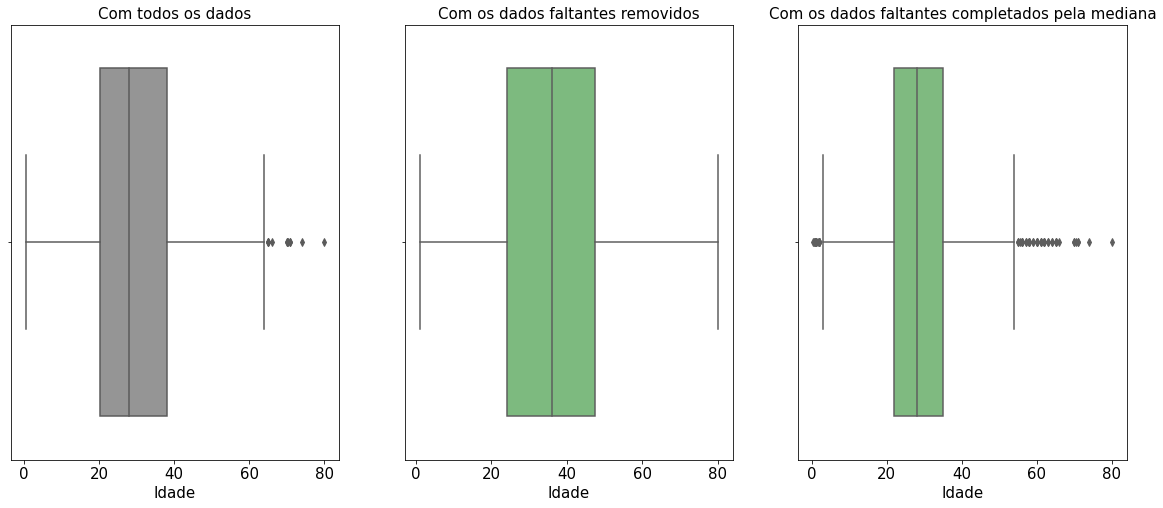

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [35]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(20,8))

#box plot com os dados faltantes influenciando
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Age', data=train,palette='Greys', ax=axis1)
ax.set_xlabel('Idade', fontsize=15)
ax.set_title('Com todos os dados', fontsize=15)

#com a remoção dos dados faltantes
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Age', data=train_1, palette='Greens', ax=axis2)
ax.set_xlabel('Idade', fontsize=15)
ax.set_title('Com os dados faltantes removidos', fontsize=15)

#com a remoção dos dados faltantes
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Age', data=train_2, palette='Greens_r', ax=axis3)
ax.set_xlabel('Idade', fontsize=15)
ax.set_title('Com os dados faltantes completados pela mediana', fontsize=15)

Com base na tabela describe e nos gráficcos acima, observamos que a média de idades é os outliers são alterados. 

Notamos que quando excluímos os dados faltantes os dados passam a impressão de que não há outliers, mas isso pode ser interpretado como perda de informação, que prejudicaria o a construção dos modelos, análises e/ou levar a conclusões erradas.

Intuitivamente, os outliers esperados num navio com as condições do Titanic são bebês, crianças e idosos, que aparecem no terceiro boxplot onde os dados faltantes foram preenchidos com a moda.

Quantos idosos e quantos bebês estavam presentes no Titanic?

In [36]:
pd.DataFrame(train_2.query('Age > 55')["Survived"].value_counts())

,Survived
0,28
1,12


In [37]:
pd.DataFrame(train_2.query('Age < 2')["Survived"].value_counts())


,Survived
1,12
0,2


Pela rápida busca acima, vimos que haviam 40 passageiros acima dos 55 anos dos quais 12 sobreviveram. 

Também haviam 14 crianças abaixo de 2 anos das quais 12 sobreviveram. Considerando qua as crianças estavam acompanhadas dos pais, esse dado corrobora a análise feita com a variável Parch anteriormente.

AttributeError: module 'seaborn' has no attribute 'histplot'

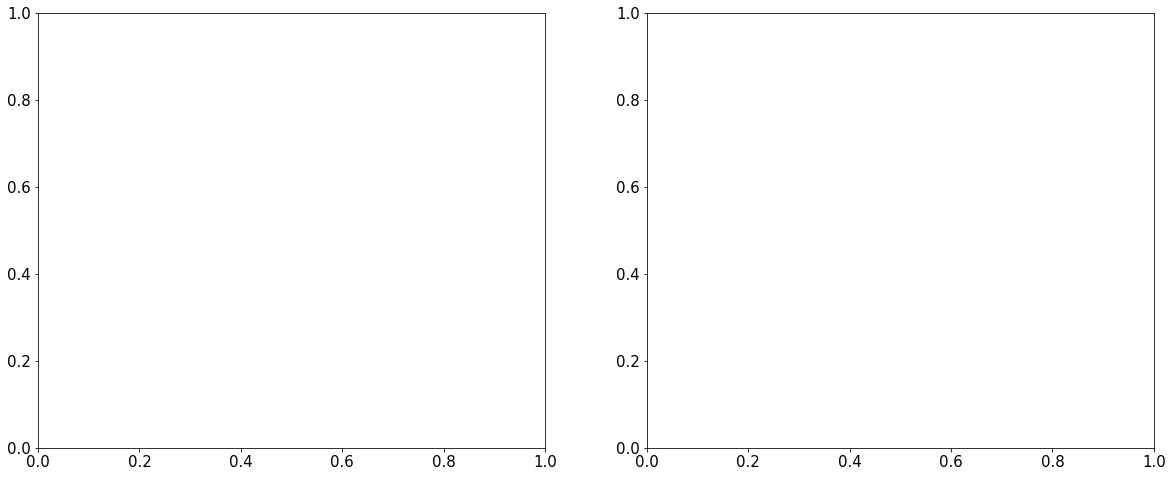

<Figure size 720x576 with 0 Axes>

In [38]:
#Traçando a distribuição de idades
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,8))

plt.figure(figsize=(10,8))
ax = sns.histplot(data=train_2, x='Age', palette='Blues', ax= axis1)
ax.set_title('Distribuição de Passageiros por Idade', fontsize=20, pad=15)
ax.set_xlabel('Idade', fontsize=15)
ax.set_ylabel('Quantidade', fontsize=15)
            

plt.figure(figsize=(10,8))
ax = sns.histplot(data=train_2, x='Age', hue='Survived',stat='density',palette='Greys', ax= axis2)
ax.set_title('Distribuição de Sobreviventes por Idade', fontsize=20, pad=15)
ax.set_xlabel('Idade', fontsize=15)
ax.set_ylabel('Densidade', fontsize=15)



Nos gráfico a esquerda acima vimos a distribuição da idade dos passageiros  e no gráfico à direita a distribuição em % de sobreviventes por idade.

Um outro modo de classificar o grupo de passageiros em relação a idade seria por classes, vejamos:
- 0-12 anos - **Infantil**
- 13-18 anos - **Adolescente**
- 19 -60 anos - **Adulto**
- 61 anos ou mais - **3ª idade.**

In [39]:
#definindo as classes pelo inicio de cada idade
classes = [0,12,18,60,81]

#definindo os nomes das classes que aparecerão no gráfico
labels = ['Infantil','Adolescentes'," Adultos", '3ª Idade']

In [40]:
pd.cut(x=train_2.Age, bins=classes, labels= labels, include_lowest=True)

0       Adultos
1       Adultos
2       Adultos
3       Adultos
4       Adultos
         ...   
886     Adultos
887     Adultos
888     Adultos
889     Adultos
890     Adultos
Name: Age, Length: 891, dtype: category
Categories (4, object): ['Infantil' < 'Adolescentes' < ' Adultos' < '3ª Idade']

In [41]:
#Construindo a coluna frequência
frequencia_idade = pd.value_counts(pd.cut(x=train_2.Age, bins=classes, labels= labels, include_lowest=True))
frequencia_idade

 Adultos        730
Adolescentes     70
Infantil         69
3ª Idade         22
Name: Age, dtype: int64

In [42]:
#Construindo a coluna percentual
percentual_idades = (pd.cut(x=train_2.Age, bins=classes, labels= labels, include_lowest=True)).value_counts(normalize=True)

percentual_idades = percentual_idades * 100 #para ficar no formato de %

percentual_idades

 Adultos        81.930415
Adolescentes     7.856341
Infantil         7.744108
3ª Idade         2.469136
Name: Age, dtype: float64

In [43]:
freq_perc= pd.DataFrame({'Frequência':frequencia_idade, 'Percentual(%)':percentual_idades})
freq_perc

,Frequência,Percentual(%)
Adultos,730,81.930415
Adolescentes,70,7.856341
Infantil,69,7.744108
3ª Idade,22,2.469136


Text(0.5, 0, 'Grupo Etário')

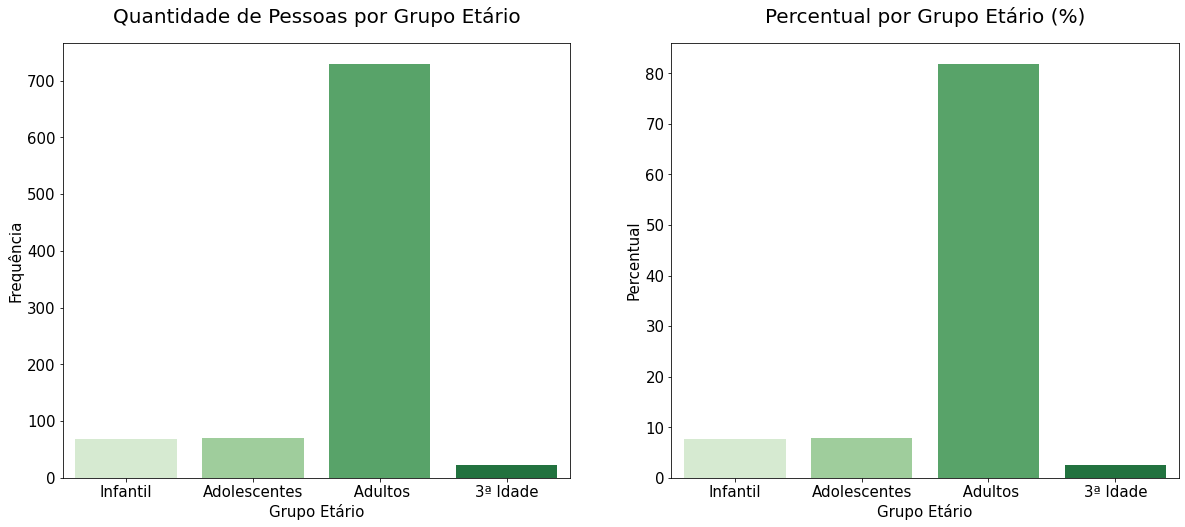

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [44]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,8))

plt.figure(figsize=(10,8))
ax = sns.barplot(data=freq_perc,x=freq_perc.index, y='Frequência', palette='Greens', ax = axis1)
ax.set_title('Quantidade de Pessoas por Grupo Etário', fontsize=20, pad=20)
ax.set_ylabel('Frequência', fontsize=15)
ax.set_xlabel('Grupo Etário', fontsize=15)

plt.figure(figsize=(10,8))
ax = sns.barplot(data=freq_perc,x=freq_perc.index, y='Percentual(%)', palette='Greens', ax = axis2)
ax.set_title('Percentual por Grupo Etário (%)', fontsize=20, pad=20)
ax.set_ylabel('Percentual', fontsize=15)
ax.set_xlabel('Grupo Etário', fontsize=15)

## **2.5 Correlação dos dados**
Nesta seção vamos investigar o quão relacionados estão as nossas variáveis, por exemplo, o preço da passagem (Fare) com a Classe (P-Class); as variáveis SibSp e ParCh. 
Esta etapa é importante porquê se as variáveis tiverem alta correlação, elas podem ser exluídas do modelo sem afetar o desempenho dele. Diminuir as variáveis de um modelo é conhecido como redução de dimensionalidade.

<Figure size 2160x1080 with 0 Axes>

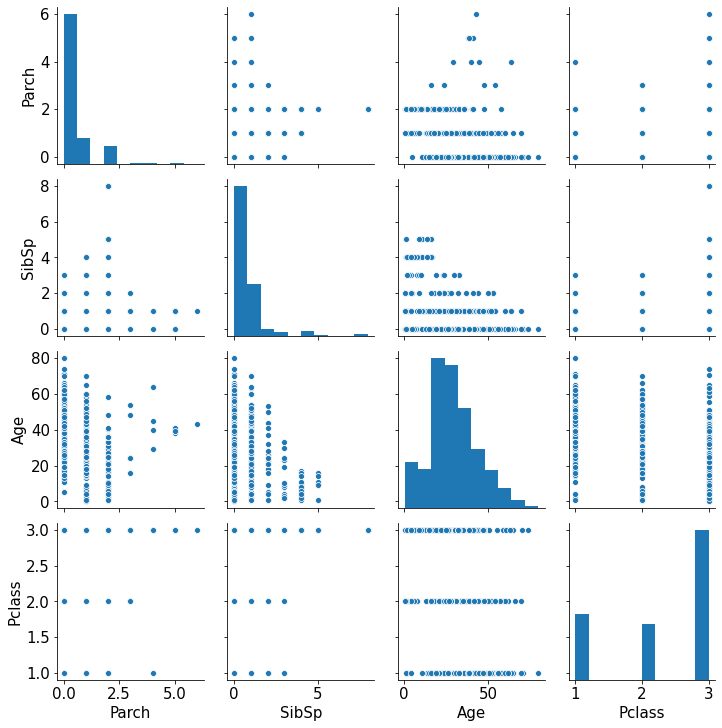

In [45]:
plt.figure(figsize=(30,15))
sns.pairplot(train, x_vars=['Parch', 'SibSp', 'Age', 'Pclass'], y_vars=['Parch', 'SibSp', 'Age', 'Pclass'])

A vantagem desse tipo de gráfico é que a diagonal dele traz informação útil, exibindo um histograma de cada atributo (outras opções estão disponíveis). Rapidamente a gente consegue ver coisas como – por exemplo – o fato de que pessoas mais velhas estão mais concentradas na 1ª Classe e pessoas mais jovens na 3ª classe. Por fim, finalizando a etapa de análise exploratória, vamos dar uma olhada no heatmap para entender como as variáveis estão correlacionadas, positiva ou negativamente.

In [46]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


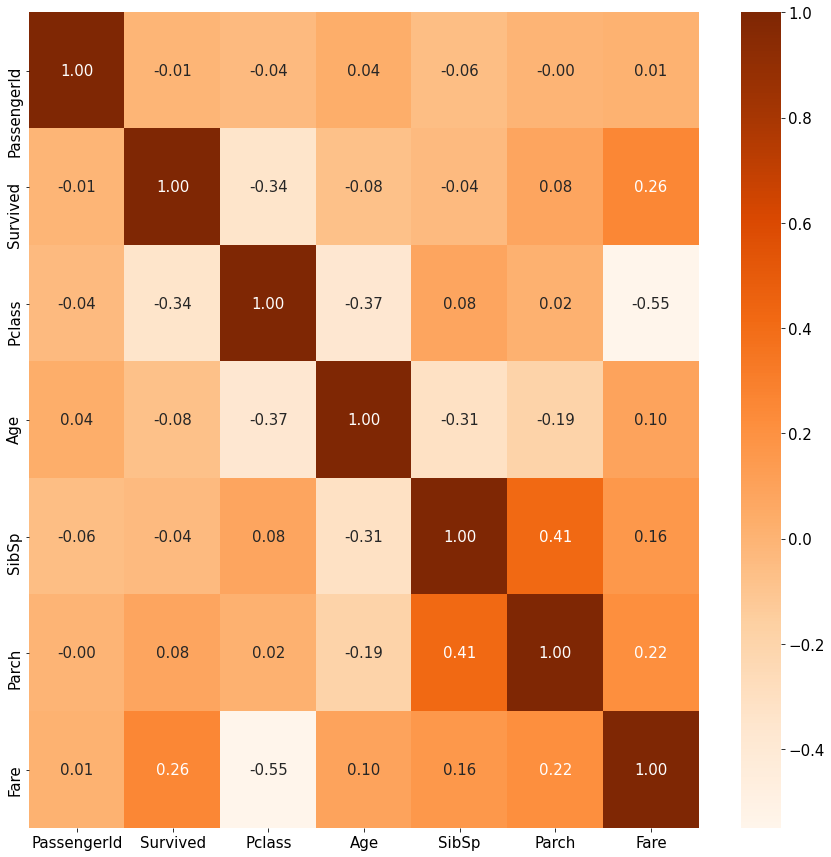

In [47]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot=True, cmap='Oranges', fmt='.2f')

Pela tabela e pelos gráficos observamos que as variáveis que mais se correlacionam são:
- Pclass &  Fare, com valor de -0.55, o que significa que quanto maior o valor de uma menor o da outra e vice versa, o que faz muito sentido, pois a Classe 3 deveria ter o menor valor em relação a outras classes. *Aqui consideramos o valor ordinal das clase com 3>2>1, e não o valor social.
- SibSp & Parch - São variáveis que tratam de graus de parentesco e tem uma correlação positiva de 0.41. 

No entanto tais correlações são fracas, isto é, elas por si só não são capazes de explicar o desempenho da outra variável. São consideradas correlações fortes valores acima de 0.75, mas isso depende da aplicação.

Com base nisso as manteremos as variáveis para a modelagem. 
Aqui finalizamos a Parte 1. Sugestões e correções são sempre bem-vindas!

Vamos para a [Parte 2](https://www.kaggle.com/samuelsferreira/desafio-do-titanic-passo-a-passo-parte-2-2)!

